#  This is a candy data set and we want to know which 10 most loved and 10 most hated chocolates.

Dataset Description:

Internal_ID
Q1-Going Out?: Are you actually going trick or treating yourself? "has values Yes or No". 

Q2-Gender: It has four different options, Femal ,Male ,Other ,I'd rather not say.

Q3-Age: Numerical field.

Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning.

Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.

Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).

Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.

Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.

Q9-Other Comments: Text Field. Lots of missing values.

Q10-Dress: Binary field. Missing values present.

Unnamed: 113

Q11-Day: Binary Answer Field. Missing values present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I started exploring and investigating the data to get familiar with it.

In [2]:
df = pd.read_csv('candy_data.csv')

In [3]:
df.sample(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
2384,90301311,No,Male,59,United States,Illinois,MEH,MEH,JOY,DESPAIR,...,plastic bag of popcorn,NaN,White and gold,NaN,Friday,1.0,NaN,NaN,NaN,"(42, 40)"
171,90273247,No,Female,24,USA,"Washington, Clark",JOY,DESPAIR,JOY,MEH,...,"Tootsie rolls, cheap stickers",Cheap caramel like in Milky Ways begins the ni...,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(79, 33)"
2404,90304972,No,Male,41,Canada,British Columbia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,90273652,No,Male,60,US,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,90282370,Yes,Male,33,USA,CO,JOY,MEH,JOY,MEH,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(66, 34)"


In [4]:
#the data doesn't dispaly all columns so I wrote this.
pd.set_option('display.max_columns',120)
df.sample(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
2205,90288432,No,Female,38,USA,GA,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,JOY,MEH,MEH,MEH,JOY,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,JOY,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,MEH,MEH,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,MEH,JOY,JOY,MEH,MEH,JOY,Reese's Peanut Butter Cups,Razors in apples,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(77, 19)"
2274,90290530,No,Female,31,Usa,Ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,90283571,No,Female,29,UK,London,JOY,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,DES

In [5]:
df.shape

(2460, 120)

In [6]:
#df.info() didn't display the info in a right way so I used this.
#Also the notbook limited the number of rows to show so I used this.
pd.set_option('display.max_rows',120)
df.dtypes

Internal ID                                                                                 int64
Q1: GOING OUT?                                                                             object
Q2: GENDER                                                                                 object
Q3: AGE                                                                                    object
Q4: COUNTRY                                                                                object
Q5: STATE, PROVINCE, COUNTY, ETC                                                           object
Q6 | 100 Grand Bar                                                                         object
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     object
Q6 | Any full-sized candy bar                                                              object
Q6 | Black Jacks                                                                           object
Q6 | Bonkers (the ca

In [7]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


# Seeing if there is any missing or duplicated values.

In [8]:
df.isna().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [9]:
df[df.duplicated()]

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"


#  I decided which columns I need and which to drop but I didn't understand questions number 7, 8 and 9 so I decided to know more about them.

note: in the next 3 cells I commented the print statement for the unique values becuase it prints a huge number of lines, I wrote this statement just to know what are the values in these columns.

In [10]:
print(df.loc[:,'Q7: JOY OTHER'].isna().sum())
#print(df.loc[:,'Q7: JOY OTHER'].unique())

1549


In [11]:
print(df.loc[:,'Q8: DESPAIR OTHER'].isna().sum())
#print(df.loc[:,'Q8: DESPAIR OTHER'].unique())

1743


In [12]:
print(df.loc[:,'Q9: OTHER COMMENTS'].isna().sum())
#print(df.loc[:,'Q9: OTHER COMMENTS'].unique())

2074


# I noticed that there are so many missing values in them and the values that they have didn't seem related to the other data or the questions we want to answer so I dropped them beside the columns that are not related to our question.

Note: I didn't actually dropped them from the real data i just sliced the columns I want to deal with.

In [13]:
df_copy = df.loc[:,'Q6 | 100 Grand Bar':'Q6 | York Peppermint Patties'] 

In [14]:
df_copy.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH

In [15]:
#I renamed the columns so I can deal with them more comfrotably
for col_name in df_copy.columns:
    new_col_name  = col_name.replace('Q6 | ','')
    df_copy.rename(columns={col_name:new_col_name}, inplace = True)
    
print(df_copy.columns)

Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)


# Getting familiar with the new data set

In [16]:
df_copy.head()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,

In [17]:
df_copy.shape

(2460, 103)

In [18]:
df_copy.dtypes

100 Grand Bar                                                                        object
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    object
Any full-sized candy bar                                                             object
Black Jacks                                                                          object
Bonkers (the candy)                                                                  object
Bonkers (the board game)                                                             object
Bottle Caps                                                                          object
Box'o'Raisins                                                                        object
Broken glow stick                                                                    object
Butterfinger                                                                         object
Cadbury Creme Eggs                                                              

In [19]:
df_copy.describe()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
count,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,1782,1747,1766,1765,1434,1762,1518,1716,1515,1786,1724,1730,1774,1775,1742,1769,1735,1436,1731,1767,1772,1785,1789,1733,1731,1696,1647,1518,1736,1684,1649,1720,1716,1737,1762,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
freq,873,1089,1559,793,857,715,670,1179,1625,1177,820,743,1325,953,1439,1040,644,761,592,1406,1433,664,1176,676,1176,703,708,742,1462,748,907,855,1069,1105,896,834,889,1061,747,956,1020,895,1435,570,1447,729,690,707,902,1277,931,1026,709,647,878,1185,1122,1291,1018,1001,972,757,693,759,644,904,857,805,769,1188,725,1085,1076,649,1480,1498,1136,706,1151,1151,829,729,605,1399,770,1140,853,783,754,763,613,754,1252,1058,1320,836,1413,1146,723,840,1455,1289,1105


In [20]:
#making sure that every column has no unexpected values and they all have the same values
for col in df_copy.columns:
    lst = df_copy[col].unique().astype(str)
    print(sorted(lst))

['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR', 'JOY', 'MEH', 'nan']
['DESPAIR'

In [21]:
df_copy.isna().sum()

100 Grand Bar                                                                         747
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Any full-sized candy bar                                                              672
Black Jacks                                                                           958
Bonkers (the candy)                                                                   992
Bonkers (the board game)                                                             1006
Bottle Caps                                                                           765
Box'o'Raisins                                                                         688
Broken glow stick                                                                     706
Butterfinger                                                                          682
Cadbury Creme Eggs                                                                    683
Candy Corn

In [22]:
#seeing the new null values.
df_copy.isna().sum().sum()

77825

# when dealing with the data, I found a lot of null values and I also found rows with all values are null

In [23]:
df_copy[df_copy.isnull().all(axis=1)]

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [24]:
#then Idropped them
df_copy.dropna(axis=0, how='all', inplace=True)

In [25]:
df_copy.isna().sum()

100 Grand Bar                                                                         90
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     77
Any full-sized candy bar                                                              15
Black Jacks                                                                          301
Bonkers (the candy)                                                                  335
Bonkers (the board game)                                                             349
Bottle Caps                                                                          108
Box'o'Raisins                                                                         31
Broken glow stick                                                                     49
Butterfinger                                                                          25
Cadbury Creme Eggs                                                                    26
Candy Corn           

# Getting familiar with the new data set (vol.3) 

In [26]:
df_copy.head()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,JOY,NaN,DESPAIR,NaN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,NaN,NaN,NaN,JOY,JOY,JOY,JOY,MEH,JO

In [27]:
df_copy.isna().sum()

100 Grand Bar                                                                         90
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     77
Any full-sized candy bar                                                              15
Black Jacks                                                                          301
Bonkers (the candy)                                                                  335
Bonkers (the board game)                                                             349
Bottle Caps                                                                          108
Box'o'Raisins                                                                         31
Broken glow stick                                                                     49
Butterfinger                                                                          25
Cadbury Creme Eggs                                                                    26
Candy Corn           

In [28]:
df_copy.isna().sum().sum()

10154

#  Since this is a categorical data, I think its reasonable to fill missing values with the value 'UNKNOWN'

In [29]:
df_copy.fillna('UNKNOWN',inplace=True)

In [30]:
#seeing the changes
df_copy.head()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,UNKNOWN,JOY,JOY,DESPAIR,UNKNOWN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,JOY,DESPAIR,JOY,UNKNOWN,UNKNOWN,UNKNOWN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,UNKNOWN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,UNKNOWN,JOY,UNKNOWN,DESPAIR,UNKNOWN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,UNKNOWN,JOY,JOY,JOY,JOY,JOY,JO

In [31]:
df_copy.isna().sum()

100 Grand Bar                                                                        0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Any full-sized candy bar                                                             0
Black Jacks                                                                          0
Bonkers (the candy)                                                                  0
Bonkers (the board game)                                                             0
Bottle Caps                                                                          0
Box'o'Raisins                                                                        0
Broken glow stick                                                                    0
Butterfinger                                                                         0
Cadbury Creme Eggs                                                                   0
Candy Corn                                 

In [32]:
i = 0
for col in df_copy.columns:
    print(df_copy[col].value_counts())
    i+=1
    if i > 5:
        break

JOY        873
MEH        755
UNKNOWN     90
DESPAIR     85
Name: 100 Grand Bar, dtype: int64
DESPAIR    1089
MEH         461
JOY         176
UNKNOWN      77
Name: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes), dtype: int64
JOY        1559
MEH         212
DESPAIR      17
UNKNOWN      15
Name: Any full-sized candy bar, dtype: int64
DESPAIR    793
MEH        617
UNKNOWN    301
JOY         92
Name: Black Jacks, dtype: int64
MEH        857
DESPAIR    495
UNKNOWN    335
JOY        116
Name: Bonkers (the candy), dtype: int64
MEH        715
DESPAIR    546
UNKNOWN    349
JOY        193
Name: Bonkers (the board game), dtype: int64


# I made a final new data frame by transposing the last data set so I can get the choclate names in one column (as an index at first) and the sum of each unique value for a choclate opposite to it

In [33]:
final_df = df_copy.T

In [34]:
#getting familiar with the new data.
final_df.head()

,1,3,4,5,7,8,9,11,12,13,14,15,16,17,20,21,22,23,26,27,28,29,31,32,33,34,37,39,41,43,44,45,46,49,50,51,52,53,54,56,57,58,59,60,63,64,65,68,69,70,71,72,73,74,75,77,79,80,81,82,...,2373,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2387,2390,2391,2392,2395,2396,2398,2399,2400,2402,2403,2406,2407,2410,2411,2412,2413,2414,2418,2419,2421,2422,2423,2424,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2438,2439,2441,2442,2443,2444,2452,2453,2454,2455,2456,2457,2459
100 Grand Bar,MEH,MEH,JOY,JOY,JOY,JOY,MEH,JOY,MEH,JOY,MEH,JOY,JOY,MEH,UNKNOWN,MEH,MEH,JOY,MEH,JOY,UNKNOWN,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,UNKNOWN,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,JOY,MEH,MEH,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,MEH,UNKNOWN,DESPAIR,JOY,JOY,...,MEH,DESPAIR,JOY,MEH,JOY,JOY,JOY,MEH,MEH,MEH,MEH,JOY,JOY,JOY,JOY,MEH,MEH,MEH,JOY,JOY,JOY,MEH,UNKNOWN,UNKNOWN,MEH,JOY,MEH,UNKNOWN,MEH,JOY,MEH,JOY,JOY,UNKNOWN,MEH,MEH,MEH,JOY,JOY,UNKNOWN,JOY,JOY,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,MEH,DESPAIR,UNKNOWN,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,UNKNOWN,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,UNKNOWN,MEH,DESPAIR,MEH,UNKNOWN,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR
Any full-sized candy bar,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY,MEH,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,UNKNOWN,JOY,JOY,JOY,...,JOY,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,JOY,UNKNOWN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY
Black Jacks,MEH,MEH,DESPAIR,UNKNOWN,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,MEH,MEH,UNKNOWN,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,MEH,MEH,UNKNOWN,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,UNKNOWN,DESPAIR,MEH,MEH,MEH,UNKNOWN,UNKNOWN,DESPAIR,UNKNOWN,...,MEH,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,UNKNOWN,MEH,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,MEH,UNKNOWN,UNKNOWN,JOY,DESPAIR,MEH,MEH,DESPAIR,UNKNOWN,MEH,DESPAIR,MEH,UNKNOWN,MEH,MEH,UNKNOWN,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,MEH,MEH,UNKNOWN,MEH,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,DESPAIR
Bonkers (the candy),DESPAIR,MEH,MEH,UNKNOWN,DESPAIR,MEH,MEH,MEH,MEH,MEH,JOY,JOY,MEH,MEH,UNKNOWN,JOY,UNKNOWN,DESPAIR,UNKNOWN,MEH,MEH,DESPAIR,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,MEH,MEH,MEH,UNKNOWN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,MEH,MEH,UNKNOWN,MEH,DESPAIR,UNKNOWN,...,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,UNKNOWN,MEH,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,UNKNOWN,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,UNKNOWN,MEH,DESPAIR,MEH,UNKNOWN,MEH,UNKNOWN,MEH,MEH,MEH,UNKNOWN,MEH,MEH,UNKNOWN,MEH,MEH,UNKNOWN,MEH,UNKNOWN,DESPAIR,MEH,UNKNOWN,JOY,DESPAIR,UNKNOWN,MEH,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,MEH,MEH,MEH,DESPAIR,UNKNOWN,MEH,DESPAIR


In [35]:
#making sure it was created correctly
print(final_df.shape)
print(df_copy.shape)

(103, 1803)
(1803, 103)


In [36]:
final_df.index    

Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)

# Adding new columns

In [37]:
final_df['JOY'] = np.nan
final_df['MEH'] = np.nan
final_df['DESPAIR'] = np.nan
final_df['UNKNOWN'] = np.nan

In [38]:
final_df.head()

,1,3,4,5,7,8,9,11,12,13,14,15,16,17,20,21,22,23,26,27,28,29,31,32,33,34,37,39,41,43,44,45,46,49,50,51,52,53,54,56,57,58,59,60,63,64,65,68,69,70,71,72,73,74,75,77,79,80,81,82,...,2378,2379,2380,2381,2382,2383,2384,2385,2387,2390,2391,2392,2395,2396,2398,2399,2400,2402,2403,2406,2407,2410,2411,2412,2413,2414,2418,2419,2421,2422,2423,2424,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2438,2439,2441,2442,2443,2444,2452,2453,2454,2455,2456,2457,2459,JOY,MEH,DESPAIR,UNKNOWN
100 Grand Bar,MEH,MEH,JOY,JOY,JOY,JOY,MEH,JOY,MEH,JOY,MEH,JOY,JOY,MEH,UNKNOWN,MEH,MEH,JOY,MEH,JOY,UNKNOWN,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,UNKNOWN,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,JOY,MEH,MEH,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,MEH,UNKNOWN,DESPAIR,JOY,JOY,...,JOY,JOY,JOY,MEH,MEH,MEH,MEH,JOY,JOY,JOY,JOY,MEH,MEH,MEH,JOY,JOY,JOY,MEH,UNKNOWN,UNKNOWN,MEH,JOY,MEH,UNKNOWN,MEH,JOY,MEH,JOY,JOY,UNKNOWN,MEH,MEH,MEH,JOY,JOY,UNKNOWN,JOY,JOY,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,MEH,DESPAIR,UNKNOWN,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,NaN,NaN,NaN,NaN
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,UNKNOWN,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,UNKNOWN,MEH,DESPAIR,MEH,UNKNOWN,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,NaN,NaN,NaN,NaN
Any full-sized candy bar,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY,MEH,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,UNKNOWN,JOY,JOY,JOY,...,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,JOY,UNKNOWN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,NaN,NaN,NaN,NaN
Black Jacks,MEH,MEH,DESPAIR,UNKNOWN,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,MEH,MEH,UNKNOWN,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,MEH,MEH,UNKNOWN,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,UNKNOWN,DESPAIR,MEH,MEH,MEH,UNKNOWN,UNKNOWN,DESPAIR,UNKNOWN,...,DESPAIR,UNKNOWN,UNKNOWN,MEH,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,MEH,UNKNOWN,UNKNOWN,JOY,DESPAIR,MEH,MEH,DESPAIR,UNKNOWN,MEH,DESPAIR,MEH,UNKNOWN,MEH,MEH,UNKNOWN,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,MEH,MEH,UNKNOWN,MEH,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,DESPAIR,NaN,NaN,NaN,NaN
Bonkers (the candy),DESPAIR,MEH,MEH,UNKNOWN,DESPAIR,MEH,MEH,MEH,MEH,MEH,JOY,JOY,MEH,MEH,UNKNOWN,JOY,UNKNOWN,DESPAIR,UNKNOWN,MEH,MEH,DESPAIR,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,UNKNOWN,MEH,MEH,MEH,UNKNOWN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,MEH,MEH,UNKNOWN,MEH,DESPAIR,UNKNOWN,...,DESPAIR,UNKNOWN,UNKNOWN,MEH,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,UNKNOWN,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,UNKNOWN,UNKNOWN,MEH,DESPAIR,MEH,UNKNOWN,MEH,UNKNOWN,MEH,MEH,MEH,UNKNOWN,MEH,MEH,UNKNOWN,MEH,MEH,UNKNOWN,MEH,UNKNOWN,DESPAIR,MEH,UNKNOWN,JOY,DESPAIR,UNKNOWN,MEH,DESPAIR,UNKNOWN,DESPAIR,UNKNOWN,MEH,MEH,MEH,DESPAIR,UNKNOWN,MEH,DESPAIR,NaN,NaN,NaN,NaN


# Slicing the columns I need

In [39]:
final_df = final_df.loc[:,'JOY':'UNKNOWN']

In [40]:
final_df

,JOY,MEH,DESPAIR,UNKNOWN
100 Grand Bar,NaN,NaN,NaN,NaN
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),NaN,NaN,NaN,NaN
Any full-sized candy bar,NaN,NaN,NaN,NaN
Black Jacks,NaN,NaN,NaN,NaN
Bonkers (the candy),NaN,NaN,NaN,NaN
Bonkers (the board game),NaN,NaN,NaN,NaN
Bottle Caps,NaN,NaN,NaN,NaN
Box'o'Raisins,NaN,NaN,NaN,NaN
Broken glow stick,NaN,NaN,NaN,NaN
Butterfinger,NaN,NaN,NaN,NaN


In [41]:
final_df.shape

(103, 4)

# In the next 2 cells i just wanted to make sure that i can access to the value counts with strings as and indicies without any problem.

In [42]:
i=0
for col in df_copy:
    print(df_copy[col].value_counts())
    print('--------------------------')
    i+=1
    if i > 5:
        break

JOY        873
MEH        755
UNKNOWN     90
DESPAIR     85
Name: 100 Grand Bar, dtype: int64
--------------------------
DESPAIR    1089
MEH         461
JOY         176
UNKNOWN      77
Name: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes), dtype: int64
--------------------------
JOY        1559
MEH         212
DESPAIR      17
UNKNOWN      15
Name: Any full-sized candy bar, dtype: int64
--------------------------
DESPAIR    793
MEH        617
UNKNOWN    301
JOY         92
Name: Black Jacks, dtype: int64
--------------------------
MEH        857
DESPAIR    495
UNKNOWN    335
JOY        116
Name: Bonkers (the candy), dtype: int64
--------------------------
MEH        715
DESPAIR    546
UNKNOWN    349
JOY        193
Name: Bonkers (the board game), dtype: int64
--------------------------


In [43]:
i = 0
for col in df_copy:
    print('JOY',df_copy[col].value_counts()['JOY'])
    print('MEH',df_copy[col].value_counts()['MEH'])
    print('DESPAIR',df_copy[col].value_counts()['DESPAIR'])
    print('UNKNOWN',df_copy[col].value_counts()['UNKNOWN'])
    print('--------------------------')
    i+=1
    if i > 5:
        break

JOY 873
MEH 755
DESPAIR 85
UNKNOWN 90
--------------------------
JOY 176
MEH 461
DESPAIR 1089
UNKNOWN 77
--------------------------
JOY 1559
MEH 212
DESPAIR 17
UNKNOWN 15
--------------------------
JOY 92
MEH 617
DESPAIR 793
UNKNOWN 301
--------------------------
JOY 116
MEH 857
DESPAIR 495
UNKNOWN 335
--------------------------
JOY 193
MEH 715
DESPAIR 546
UNKNOWN 349
--------------------------


In [44]:
#Since it works correctly, I used it.
for col in df_copy.columns:
    final_df.loc[col,'JOY'] = df_copy[col].value_counts()['JOY']
    final_df.loc[col,'MEH'] = df_copy[col].value_counts()['MEH']
    final_df.loc[col,'DESPAIR'] = df_copy[col].value_counts()['DESPAIR']
    final_df.loc[col,'UNKNOWN'] = df_copy[col].value_counts()['UNKNOWN']

In [45]:
final_df

,JOY,MEH,DESPAIR,UNKNOWN
100 Grand Bar,873.0,755.0,85.0,90.0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),176.0,461.0,1089.0,77.0
Any full-sized candy bar,1559.0,212.0,17.0,15.0
Black Jacks,92.0,617.0,793.0,301.0
Bonkers (the candy),116.0,857.0,495.0,335.0
Bonkers (the board game),193.0,715.0,546.0,349.0
Bottle Caps,465.0,670.0,560.0,108.0
Box'o'Raisins,117.0,476.0,1179.0,31.0
Broken glow stick,24.0,105.0,1625.0,49.0
Butterfinger,1177.0,460.0,141.0,25.0


In [46]:
#making choclates as a normal column so I can use it in the visualization.
final_df.reset_index(inplace=True)
final_df.rename(columns={'index':'Choclate'},inplace=True)

In [47]:
final_df.head()

,Choclate,JOY,MEH,DESPAIR,UNKNOWN
0,100 Grand Bar,873.0,755.0,85.0,90.0
1,Anonymous brown globs that come in black and o...,176.0,461.0,1089.0,77.0
2,Any full-sized candy bar,1559.0,212.0,17.0,15.0
3,Black Jacks,92.0,617.0,793.0,301.0
4,Bonkers (the candy),116.0,857.0,495.0,335.0


# Finally I was able to determine which are the most 10 loved and most 10 hated choclates without any problem and then visualizing them.

In [48]:
most_10_loved = final_df.sort_values('JOY', ascending=False).loc[:,['Choclate','JOY']][:10]
most_10_loved

,Choclate,JOY
2,Any full-sized candy bar,1559.0
75,Reese’s Peanut Butter Cups,1498.0
44,Kit Kat,1447.0
14,"Cash, or other forms of legal tender",1439.0
96,Twix,1413.0
83,Snickers,1399.0
94,Tolberone something or other,1320.0
57,Peanut M&M’s,1291.0
49,Lindt Truffle,1277.0
69,Nestle Crunch,1188.0


In [49]:
most_10_hated = final_df.sort_values('DESPAIR', ascending=False).loc[:,['Choclate','DESPAIR']][:10]
most_10_hated

,Choclate,DESPAIR
8,Broken glow stick,1625.0
74,Real Housewives of Orange County Season 9 Blue...,1480.0
28,Gum from baseball cards,1462.0
100,White Bread,1455.0
42,Kale smoothie,1435.0
20,Dental paraphenalia,1433.0
19,Creepy Religious comics/Chick Tracts,1406.0
12,Candy that is clearly just the stuff given out...,1325.0
101,Whole Wheat anything,1289.0
92,Those odd marshmallow circus peanut things,1252.0


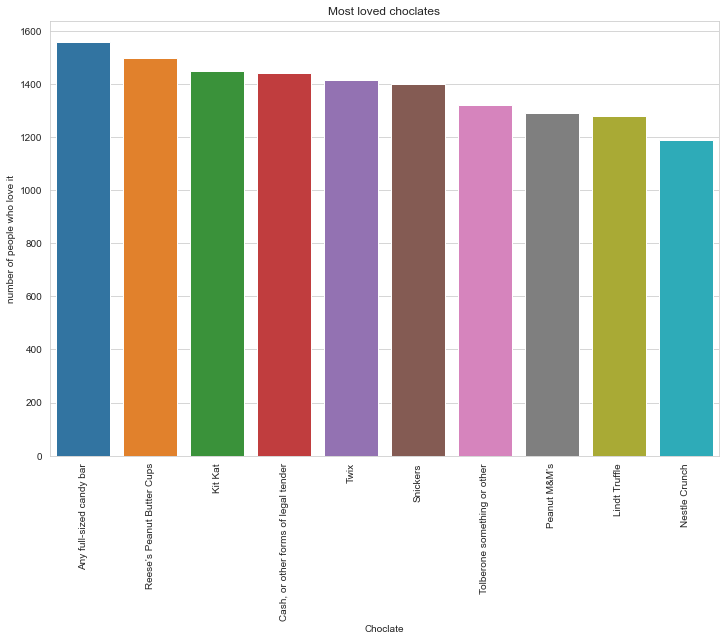

In [50]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
g = sns.barplot(x='Choclate',y='JOY',data=most_10_loved)
plt.xticks(rotation=90)
g.set_title('Most loved choclates')
g.set(xlabel='Choclate', ylabel='number of people who love it')
plt.show()

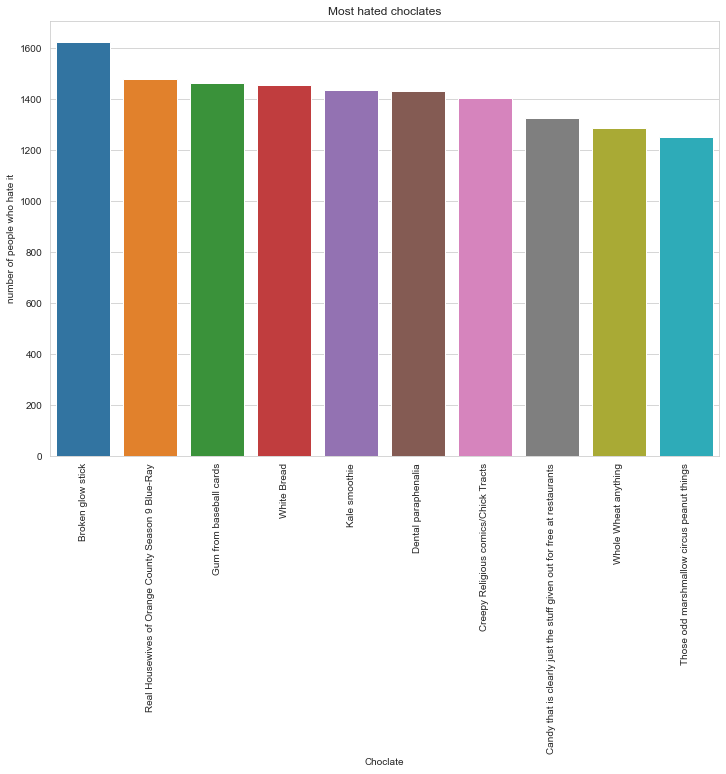

In [51]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
g = sns.barplot(x='Choclate',y='DESPAIR',data=most_10_hated)
plt.xticks(rotation=90)
g.set_title('Most hated choclates')
g.set(xlabel='Choclate', ylabel='number of people who hate it')
plt.show()